In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import visuals as vs
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.cross_validation import ShuffleSplit

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df.fillna(df.mean())
#max_embarking_string = df.groupby(['Embarked']).count()
df['Embarked'] = df['Embarked'].fillna('S')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Classification According To Sex (Male/Female)

In [8]:
total_survived = df[(df['Survived']==1)]
total_dead = df[(df['Survived']==0)]
total_females = df[(df['Sex']=='female')]
total_males = df[(df['Sex']=='male')]


female_survived = total_females[(total_females['Survived']==1)]
male_survived = total_males[(total_males['Survived']==1)]
female_dead = total_females[(total_females['Survived']==0)]
male_dead = total_males[(total_males['Survived']==0)]

print("Total Number Of Visiters: ",df.shape[0])
print("Total Female Visitors: ",len(total_females))
print("Total male Visitors: ",len(total_males),"\n")

print("Total Number Of Peoples Who Survived: ",len(total_survived))
print("Total Female Survived: ",len(female_survived))
print("Total Male Survived:  ",len(male_survived),"\n")

print("Total Number Of Visiters Who Dead: ",len(total_dead))
print("Total Female Who Dead: ",len(female_dead))
print("Total Male Who Dead:  ",len(male_dead),"\n")

Total Number Of Visiters:  891
Total Female Visitors:  314
Total male Visitors:  577 

Total Number Of Peoples Who Survived:  342
Total Female Survived:  233
Total Male Survived:   109 

Total Number Of Visiters Who Dead:  549
Total Female Who Dead:  81
Total Male Who Dead:   468 



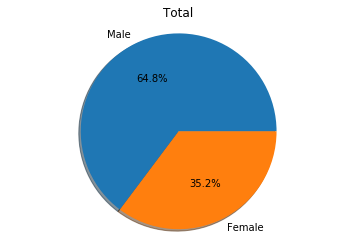

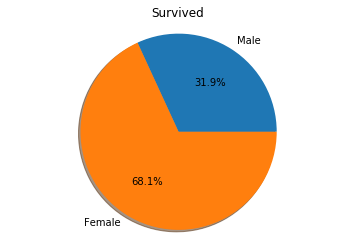

In [9]:
labels = 'Male', 'Female'
total_sizes = [len(total_males), len(total_females)]
# Plot
plt.pie(total_sizes,labels=labels,autopct='%1.1f%%',shadow=True)
plt.title("Total") 
plt.axis('equal')
plt.show()

sizes = [len(male_survived), len(female_survived)]
# Plot
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
plt.title("Survived") 
plt.axis('equal')
plt.show()

### PClass

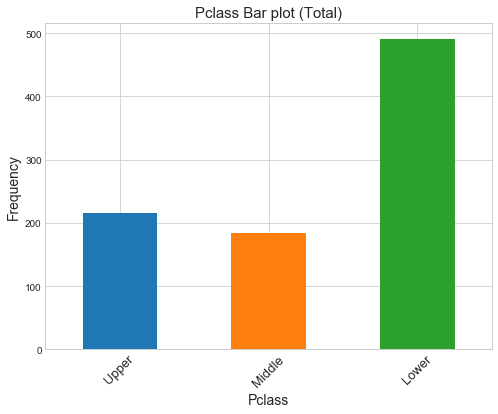

In [15]:
df.groupby('Pclass')['PassengerId'].count().plot(kind='bar',figsize=(8,6))
plt.xticks([0,1,2], ["Upper", "Middle", "Lower"], rotation=45,fontsize=13)
plt.xlabel('Pclass',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Pclass Bar plot (Total)',fontsize=15)
sns.set_style("whitegrid")

Text(0.5,1,'Pclass Bar plot (Survived)')

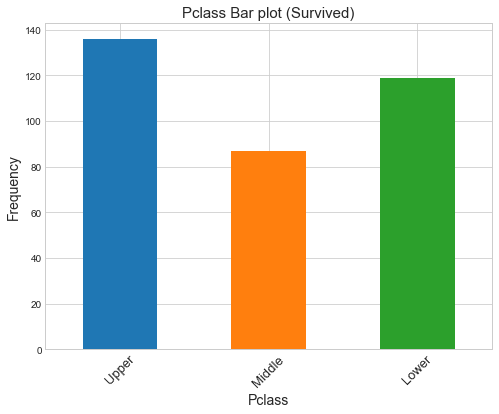

In [16]:
total_survived.groupby('Pclass')['PassengerId'].count().plot(kind='bar',figsize=(8,6))
plt.xticks([0,1,2], ["Upper", "Middle", "Lower"], rotation=45,fontsize=13)
plt.xlabel('Pclass',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Pclass Bar plot (Survived)',fontsize=15)

In [17]:
class_total = np.array(df.groupby('Pclass').count()['Survived'])
class_total

array([216, 184, 491], dtype=int64)

In [18]:
class_survived = np.array(total_survived.groupby('Pclass').count()['Survived'])
class_survived

array([136,  87, 119], dtype=int64)

Text(0.5,1,'Pclass Survival Ratio')

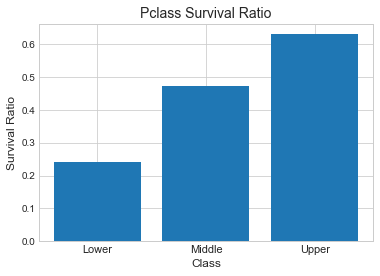

In [19]:
ratio = class_survived/class_total
x = ['Upper','Middle','Lower']
plt.bar(x,ratio)
plt.xticks(fontsize=11)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Survival Ratio',fontsize=12)
plt.title('Pclass Survival Ratio',fontsize=14)

### Age

In [20]:
print("Age Perameteras Of Peoples Who Survived: ")
print("Average Age: ",total_survived.mean()['Age'])
print("Min. Age : ",total_survived['Age'].min())
print('Max. Age:  ',total_survived['Age'].max())
print("Median Age: ",total_survived['Age'].median())
print("Standerd Deviation: ",total_survived['Age'].std(),"\n")

print("Age Perameteras Of Peoples Who Dead: ")
print("Average Age: ",total_dead.mean()['Age'])
print("Min. Age : ",total_dead['Age'].min())
print('Max. Age:  ',total_dead['Age'].max())
print("Median Age: ",total_dead['Age'].median())
print("Standerd Deviation: ",total_dead['Age'].std(),"\n")

Age Perameteras Of Peoples Who Survived: 
Average Age:  28.54977812177503
Min. Age :  0.42
Max. Age:   80.0
Median Age:  29.69911764705882
Standerd Deviation:  13.772497669820401 

Age Perameteras Of Peoples Who Dead: 
Average Age:  30.415099646415896
Min. Age :  1.0
Max. Age:   74.0
Median Age:  29.69911764705882
Standerd Deviation:  12.457370325767483 



Text(0.5,1,'Age Histogram (Total)')

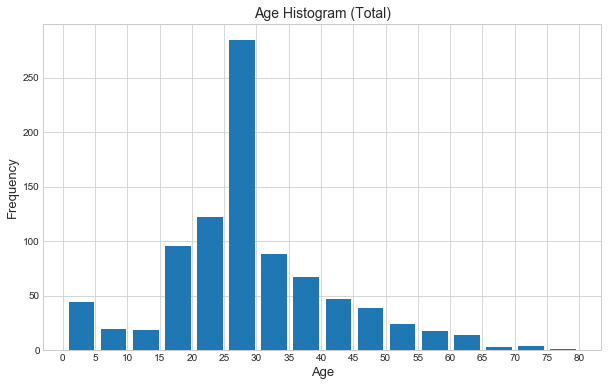

In [21]:
df['Age'].hist(histtype='bar',bins=16,rwidth=0.8,figsize=(10,6))
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
plt.xticks(ticks)
plt.xlabel('Age',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.title('Age Histogram (Total)',fontsize=14)

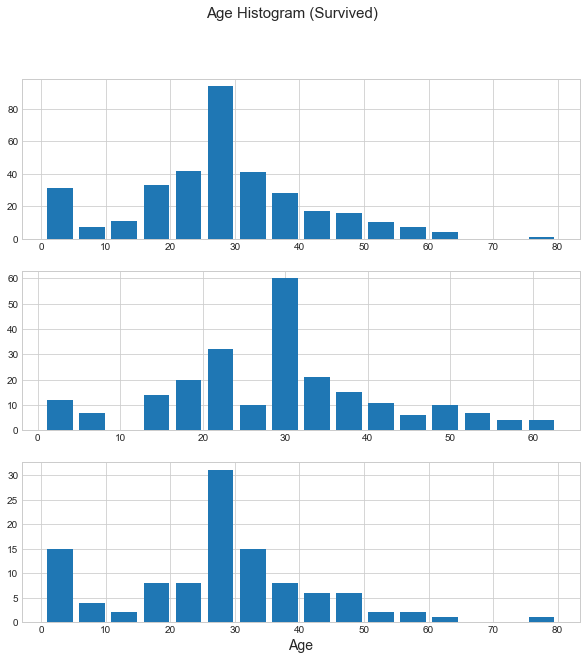

In [22]:
#Total Survived Vs Age
fig,ax = plt.subplots(3,figsize=(10,10))
plt.suptitle("Age Histogram (Survived)",fontsize = 15)
plt.xlabel("Age",fontsize=14)
total_survived['Age'].hist(histtype='bar',rwidth=0.8,ax=ax[0],bins=16)

female_survived['Age'].hist(histtype='bar',rwidth=0.8,ax=ax[1],bins=16)

male_survived['Age'].hist(histtype='bar',rwidth=0.8,ax=ax[2],bins=16)

### Parch And Sibsp

In [23]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Predictions

In [25]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    # Return the score
    return score

In [26]:
# 0 for male and 1 for female
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [27]:
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [28]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

In [34]:
df['Family'] =  df["Parch"] + df["SibSp"]
df['Family'].loc[df['Family'] > 0] = 1
df['Family'].loc[df['Family'] == 0] = 0

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
df.loc[ df['Fare'] <= 100, 'Fare'] = 0
df.loc[ df['Fare'] > 100 , 'Fare'] = 1
#df.loc[(df['Fare'] > 200) & (df['Fare'] <= 300), 'Fare'] = 2
#df.loc[(df['Fare'] > 300) & (df['Fare'] <= 400), 'Fare'] = 3
#df.loc[ df['Fare'] > 400, 'Fare'] = 4

In [65]:
#df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

X = np.array(df.loc[:,['Pclass','Sex','Age','Embarked','Family']])
y = np.array(np.array(df['Survived']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [66]:
def fit_model(X, y):
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = RandomForestClassifier()
    params = {'n_jobs':range(1,10)}
    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor,params,scoring_fnc,cv = cv_sets)

    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [67]:
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['n_jobs']))

Parameter 'max_depth' is 2 for the optimal model.


In [68]:
#RF = RandomForestClassifier(n_jobs = 2)
#RF.fit(X_train, y_train)
reg.score(X_train, y_train)

0.8342696629213483

In [69]:
pred = reg.predict(X_test)

In [70]:
accuracy_score(y_test,pred)

0.7988826815642458

In [73]:
clf = svm.SVC()
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

0.8202247191011236

In [74]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.7988826815642458

In [75]:
test_df = pd.read_csv('test.csv')

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [77]:
test_df=test_df.fillna(df.mean())
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
# 0 for male and 1 for female
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [79]:
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [80]:
test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[ test_df['Age'] > 64, 'Age'] = 4

In [81]:
test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [82]:
test_df.loc[ test_df['Fare'] <= 100, 'Fare'] = 0
test_df.loc[test_df['Fare'] > 100, 'Fare'] = 1
#test_df.loc[(test_df['Fare'] > 200) & (test_df['Fare'] <= 300), 'Fare'] = 2
#test_df.loc[(test_df['Fare'] > 300) & (test_df['Fare'] <= 400), 'Fare'] = 3
#test_df.loc[ test_df['Fare'] > 400, 'Fare'] = 4

In [83]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,363272,0.0,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,0.0,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,0.0,NaN,0,1


In [85]:
X_test_again = np.array(test_df.loc[:,['Pclass','Sex','Age','Embarked','Family']]) 

In [86]:
pred = reg.predict(X_test_again)

In [87]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": pred})
submission.to_csv('submission.csv', index=False)